# Importing Libraries

In [2]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [3]:
from scipy.stats import chi2 # Distribution (cdf etc.)
from scipy.stats import chisquare # Statistical test (chistat, pvalue)
from scipy.stats import chi2_contingency # Categorical Vs Categorical
from scipy.stats import ttest_rel,ttest_1samp,ttest_ind
from scipy.stats import binom,tiecorrect
from scipy.stats import f,f_oneway
from scipy.stats import f,f_oneway,kruskal,ttest_ind,levene,shapiro,kstest,norm
from statsmodels.distributions.empirical_distribution import ECDF
from statsmodels.graphics.gofplots import qqplot
import stats

In [4]:
df=pd.read_csv("loan.csv")
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [5]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y


In [6]:
df["total_household_income"]=df["ApplicantIncome"]+df["CoapplicantIncome"]

In [7]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0


In [10]:
df_acc_total=df.loc[df["Loan_Status"]=="Y"]["total_household_income"]
df_rej_total=df.loc[df["Loan_Status"]=="N"]["total_household_income"]

In [11]:
ttest_ind(df_acc_total,df_rej_total)

Ttest_indResult(statistic=-0.773974858431208, pvalue=0.4392445339235994)

In [12]:
df_acc_total.mean()

6888.585118456492

In [13]:
df_rej_total.mean()

7323.885416666667

<AxesSubplot:xlabel='total_household_income', ylabel='Density'>

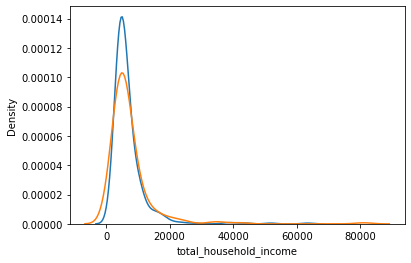

In [14]:
sns.kdeplot(df_acc_total)
sns.kdeplot(df_rej_total)

In [15]:
kstest(df_acc_total,df_rej_total)

KstestResult(statistic=0.0832099131121643, pvalue=0.2992103834451707)

In [16]:
bins=[0, 2500, 4000, 6000, 8000, 10000, 81000]
labels=['Low','Average','medium', 'h1', 'h2', 'Very high']
df["total_income_bins"]=pd.cut(df["total_household_income"],bins=bins,labels=labels)
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,h1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,medium
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,h2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,h1


In [17]:
pd.crosstab(df["Loan_Status"],df["total_income_bins"])

total_income_bins,Low,Average,medium,h1,h2,Very high
Loan_Status,,,,,,
N,14,32,65,39,13,29
Y,10,87,159,76,32,58


In [18]:
chi2_contingency(pd.crosstab(df["Loan_Status"],df["total_income_bins"]))

(10.434284908336592,
 0.06382460733584135,
 5,
 array([[  7.50488599,  37.21172638,  70.04560261,  35.96091205,
          14.07166124,  27.20521173],
        [ 16.49511401,  81.78827362, 153.95439739,  79.03908795,
          30.92833876,  59.79478827]]))

# Ability to pay EMI

In [19]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,medium
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,h1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,medium
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,medium
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,medium
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,h2
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,h1


In [21]:
df["monthly_emi"]=(df["LoanAmount"]*1000)/df["Loan_Amount_Term"]
df["monthly_emi"]

0             NaN
1      355.555556
2      183.333333
3      333.333333
4      391.666667
          ...    
609    197.222222
610    222.222222
611    702.777778
612    519.444444
613    369.444444
Name: monthly_emi, Length: 614, dtype: float64

In [24]:
df["ability_to_pay_emi_10"]=((df["total_household_income"]*0.1)>df["monthly_emi"]).astype("int")

In [25]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins,monthly_emi,ability_to_pay_emi_10
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,medium,NaN,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,h1,355.555556,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,183.333333,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,medium,333.333333,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,medium,391.666667,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average,197.222222,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,medium,222.222222,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,h2,702.777778,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,h1,519.444444,1


In [26]:
df["ability_to_pay_emi_10"].value_counts()

1    522
0     92
Name: ability_to_pay_emi_10, dtype: int64

<AxesSubplot:xlabel='ability_to_pay_emi_10', ylabel='count'>

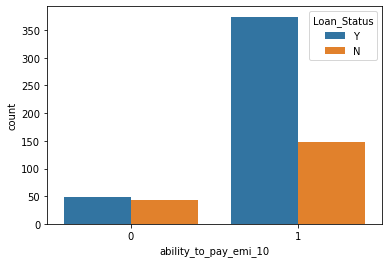

In [27]:
sns.countplot(data=df,x="ability_to_pay_emi_10",hue="Loan_Status")

In [28]:
pd.crosstab(df["ability_to_pay_emi_10"],df["Loan_Status"])

Loan_Status,N,Y
ability_to_pay_emi_10,,
0,44,48
1,148,374


In [29]:
chi2_contingency(pd.crosstab(df["ability_to_pay_emi_10"],df["Loan_Status"]))

(12.909621328812786,
 0.0003268974206671644,
 1,
 array([[ 28.76872964,  63.23127036],
        [163.23127036, 358.76872964]]))

In [30]:
chi2_contingency?

In [31]:
df["ability_to_pay_emi_50"]=((df["total_household_income"]*0.5)>df["monthly_emi"]).astype("int")

<AxesSubplot:xlabel='ability_to_pay_emi_50', ylabel='count'>

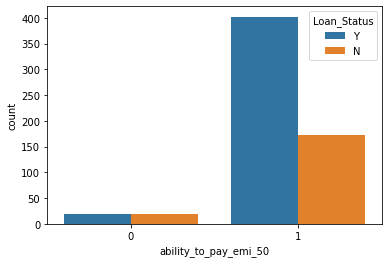

In [32]:
sns.countplot(data=df,x="ability_to_pay_emi_50",hue="Loan_Status")

In [33]:
chi2_contingency(pd.crosstab(df["ability_to_pay_emi_50"],df["Loan_Status"]))

(5.06370716479013,
 0.024431922578328144,
 1,
 array([[ 12.19543974,  26.80456026],
        [179.80456026, 395.19543974]]))

In [34]:
df.columns

Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status',
       'total_household_income', 'total_income_bins', 'monthly_emi',
       'ability_to_pay_emi_10', 'ability_to_pay_emi_50'],
      dtype='object')

In [ ]:
chi2_contingency(pd.crosstab(df["ability_to_pay_emi_50"],df["Loan_Status"]))

<AxesSubplot:xlabel='Credit_History', ylabel='count'>

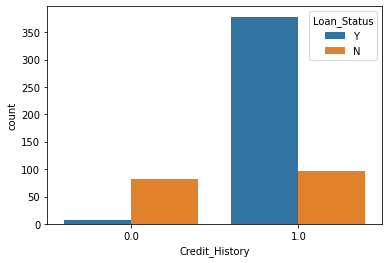

In [35]:
sns.countplot(data=df,x="Credit_History",hue="Loan_Status")

In [36]:
chi2_contingency(pd.crosstab(df["Credit_History"],df["Loan_Status"]))

(174.63729658142535,
 7.184759548750746e-40,
 1,
 array([[ 28.2464539,  60.7535461],
        [150.7535461, 324.2464539]]))

<AxesSubplot:xlabel='Property_Area', ylabel='count'>

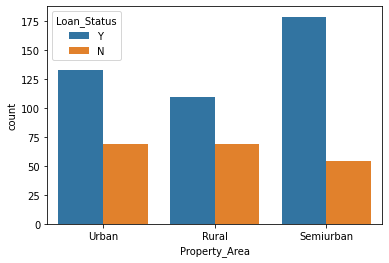

In [37]:
sns.countplot(data=df,x="Property_Area",hue="Loan_Status")

In [38]:
pd.crosstab(df["Property_Area"],df["Loan_Status"])

Loan_Status,N,Y
Property_Area,,
Rural,69,110
Semiurban,54,179
Urban,69,133


In [39]:
chi2_contingency(pd.crosstab(df["Property_Area"],df["Loan_Status"]))

(12.297623130485675,
 0.0021360187811644937,
 2,
 array([[ 55.97394137, 123.02605863],
        [ 72.85993485, 160.14006515],
        [ 63.16612378, 138.83387622]]))

# Encoding

In [40]:
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins,monthly_emi,ability_to_pay_emi_10,ability_to_pay_emi_50
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,medium,NaN,0,0
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,h1,355.555556,1,1
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,183.333333,1,1
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,medium,333.333333,1,1
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,medium,391.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,Female,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average,197.222222,1,1
610,LP002979,Male,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,medium,222.222222,1,1
611,LP002983,Male,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,h2,702.777778,1,1
612,LP002984,Male,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,h1,519.444444,1,1


In [41]:
from sklearn.preprocessing import LabelEncoder
from category_encoders import TargetEncoder

In [45]:
df[col]

0        Male
1        Male
2        Male
3        Male
4        Male
        ...  
609    Female
610      Male
611      Male
612      Male
613    Female
Name: Gender, Length: 614, dtype: object

In [46]:
label_encoder=LabelEncoder()
col="Gender"
df[col]=label_encoder.fit_transform(df[col])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins,monthly_emi,ability_to_pay_emi_10,ability_to_pay_emi_50
0,LP001002,1,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,medium,NaN,0,0
1,LP001003,1,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,h1,355.555556,1,1
2,LP001005,1,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,183.333333,1,1
3,LP001006,1,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,medium,333.333333,1,1
4,LP001008,1,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,medium,391.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,Graduate,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average,197.222222,1,1
610,LP002979,1,Yes,3+,Graduate,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,medium,222.222222,1,1
611,LP002983,1,Yes,1,Graduate,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,h2,702.777778,1,1
612,LP002984,1,Yes,2,Graduate,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,h1,519.444444,1,1


In [47]:
df["Gender"].value_counts()

1    489
0    112
2     13
Name: Gender, dtype: int64

In [49]:
df["Education"].value_counts()

Graduate        480
Not Graduate    134
Name: Education, dtype: int64

In [50]:
label_encoder=LabelEncoder()
col="Education"
df[col]=label_encoder.fit_transform(df[col])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins,monthly_emi,ability_to_pay_emi_10,ability_to_pay_emi_50
0,LP001002,1,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,Y,5849.0,medium,NaN,0,0
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,N,6091.0,h1,355.555556,1,1
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y,3000.0,Average,183.333333,1,1
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,Y,4941.0,medium,333.333333,1,1
4,LP001008,1,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,Y,6000.0,medium,391.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,Y,2900.0,Average,197.222222,1,1
610,LP002979,1,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,Y,4106.0,medium,222.222222,1,1
611,LP002983,1,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,Y,8312.0,h2,702.777778,1,1
612,LP002984,1,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,Y,7583.0,h1,519.444444,1,1


In [51]:
label_encoder=LabelEncoder()
col="Loan_Status"
df[col]=label_encoder.fit_transform(df[col])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins,monthly_emi,ability_to_pay_emi_10,ability_to_pay_emi_50
0,LP001002,1,No,0,0,No,5849,0.0,NaN,360.0,1.0,Urban,1,5849.0,medium,NaN,0,0
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,Rural,0,6091.0,h1,355.555556,1,1
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,Urban,1,3000.0,Average,183.333333,1,1
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,Urban,1,4941.0,medium,333.333333,1,1
4,LP001008,1,No,0,0,No,6000,0.0,141.0,360.0,1.0,Urban,1,6000.0,medium,391.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,0,No,2900,0.0,71.0,360.0,1.0,Rural,1,2900.0,Average,197.222222,1,1
610,LP002979,1,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,Rural,1,4106.0,medium,222.222222,1,1
611,LP002983,1,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,Urban,1,8312.0,h2,702.777778,1,1
612,LP002984,1,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,Urban,1,7583.0,h1,519.444444,1,1


In [52]:
df.groupby(["Property_Area"])["Loan_Status"].mean()

Property_Area
Rural        0.614525
Semiurban    0.768240
Urban        0.658416
Name: Loan_Status, dtype: float64

In [53]:
df["Property_Area"].value_counts()

Semiurban    233
Urban        202
Rural        179
Name: Property_Area, dtype: int64

In [57]:
df["Property_Area"].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

In [54]:
target_encoder=TargetEncoder()
col= "Property_Area"
df[col]=target_encoder.fit_transform(df[col],df["Loan_Status"])
df

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,total_household_income,total_income_bins,monthly_emi,ability_to_pay_emi_10,ability_to_pay_emi_50
0,LP001002,1,No,0,0,No,5849,0.0,NaN,360.0,1.0,0.658416,1,5849.0,medium,NaN,0,0
1,LP001003,1,Yes,1,0,No,4583,1508.0,128.0,360.0,1.0,0.614525,0,6091.0,h1,355.555556,1,1
2,LP001005,1,Yes,0,0,Yes,3000,0.0,66.0,360.0,1.0,0.658416,1,3000.0,Average,183.333333,1,1
3,LP001006,1,Yes,0,1,No,2583,2358.0,120.0,360.0,1.0,0.658416,1,4941.0,medium,333.333333,1,1
4,LP001008,1,No,0,0,No,6000,0.0,141.0,360.0,1.0,0.658416,1,6000.0,medium,391.666667,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
609,LP002978,0,No,0,0,No,2900,0.0,71.0,360.0,1.0,0.614525,1,2900.0,Average,197.222222,1,1
610,LP002979,1,Yes,3+,0,No,4106,0.0,40.0,180.0,1.0,0.614525,1,4106.0,medium,222.222222,1,1
611,LP002983,1,Yes,1,0,No,8072,240.0,253.0,360.0,1.0,0.658416,1,8312.0,h2,702.777778,1,1
612,LP002984,1,Yes,2,0,No,7583,0.0,187.0,360.0,1.0,0.658416,1,7583.0,h1,519.444444,1,1


In [56]:
df["Property_Area"].value_counts()

0.768240    233
0.658416    202
0.614525    179
Name: Property_Area, dtype: int64

In [60]:
df.groupby(["Loan_Status","Gender"])["ApplicantIncome"].mean().reset_index()

,Loan_Status,Gender,ApplicantIncome
0,0,0,4091.351351
1,0,1,5859.240000
2,0,2,3076.200000
3,1,0,4915.853333
4,1,1,5263.814159
5,1,2,14869.375000


In [61]:
# df.groupby(["Loan_Status","Gender"])[["c1","c2","c3"]].agg({"c1":"f1","c2":"f2","c3":["f3","f4"]})

In [ ]:
We believe that the loan.csv data shows that 
unmarried men are in a different income group than 
both married and unmarried women. 
To prove this, would a t-test be more appropriate 
or a chi-square test? Carry out the test on the 
'ApplicantIncome' column for the two groups and 
report the p-value. Also report your interpretation. 
Note: Assume a confidence level of 5% and round 
    off the p-value to 2 decimal places.

In [62]:
df.loc[(df["Gender"]==1) & (df["Married"]=="No")]["ApplicantIncome"]

0      5849
4      6000
13     1853
15     4950
16     3596
       ... 
579    3182
581    1836
595    3833
597    2987
603    3676
Name: ApplicantIncome, Length: 130, dtype: int64

In [ ]:
df.loc[(df["Gender"]==0)]["ApplicantIncome"]

In [63]:
# iloc works on implicit indexes 
# loc works on explicit indexes

SyntaxError: invalid syntax (4070168354.py, line 1)

In [67]:
a=pd.Series(["a","b","c"],index=[1,2,3])

In [68]:
a

1    a
2    b
3    c
dtype: object

In [70]:
a.loc[2]

'b'

In [71]:
a.iloc[2]

'c'

In [72]:
a.iloc[0:2]

1    a
2    b
dtype: object

In [73]:
a.loc[1:3]

1    a
2    b
3    c
dtype: object